In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

<ipython-input-17-93896a398b64>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/books.csv')


In [18]:
print("books shape", books.shape)
print("users shape", users.shape)
print("ratings shape", ratings.shape)

books shape (271360, 8)
users shape (278858, 3)
ratings shape (1149780, 3)


In [19]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
221310,0671826301,NATURAL,Bernard Malamud,1978,Pocket,http://images.amazon.com/images/P/0671826301.0...,http://images.amazon.com/images/P/0671826301.0...,http://images.amazon.com/images/P/0671826301.0...
117492,072140880X,Thomas the Tank Engine and Friends,W. Awdry,1984,Ladybird Books Ltd,http://images.amazon.com/images/P/072140880X.0...,http://images.amazon.com/images/P/072140880X.0...,http://images.amazon.com/images/P/072140880X.0...
156296,0394585232,Blossom,Andrew H. Vachss,1990,Daedalus Books,http://images.amazon.com/images/P/0394585232.0...,http://images.amazon.com/images/P/0394585232.0...,http://images.amazon.com/images/P/0394585232.0...
243774,0717283283,Peter Pan,Walt Disney,1993,Walt Disney,http://images.amazon.com/images/P/0717283283.0...,http://images.amazon.com/images/P/0717283283.0...,http://images.amazon.com/images/P/0717283283.0...
158494,0815410654,Desperados,John Einarson,2001,Cooper Square Publishers,http://images.amazon.com/images/P/0815410654.0...,http://images.amazon.com/images/P/0815410654.0...,http://images.amazon.com/images/P/0815410654.0...


In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [21]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [22]:
books.duplicated().sum()

0

In [23]:
# Count unique authors
unique_authors = books['Book-Author'].nunique()
print(f'Unique Authors: {unique_authors}')

# Top 10 authors by number of books
top_authors = books['Book-Author'].value_counts().head(10)
print(top_authors)

Unique Authors: 102022
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


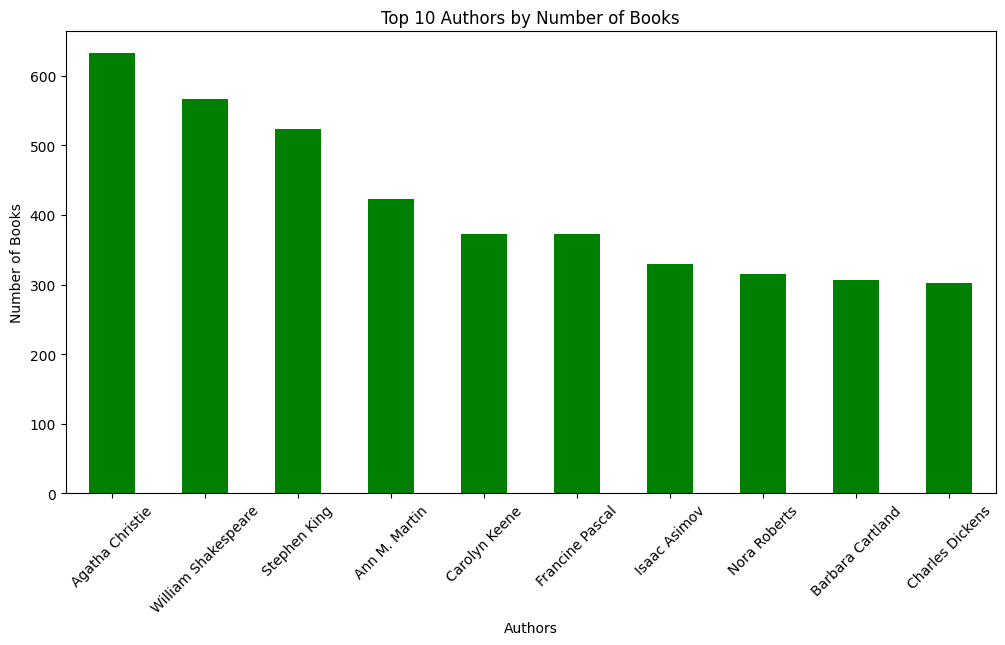

In [24]:
top_authors.plot(kind='bar', figsize=(12,6), color='green')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Convert 'Year-Of-Publication' to numeric, invalid values become NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Find rows where the conversion resulted in NaN
non_numeric_rows = books[books['Year-Of-Publication'].isna()]
print(len(non_numeric_rows))


3


In [35]:
publish_year_median=books['Year-Of-Publication'].median()

In [36]:
# Replace NaN with median
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(publish_year_median)


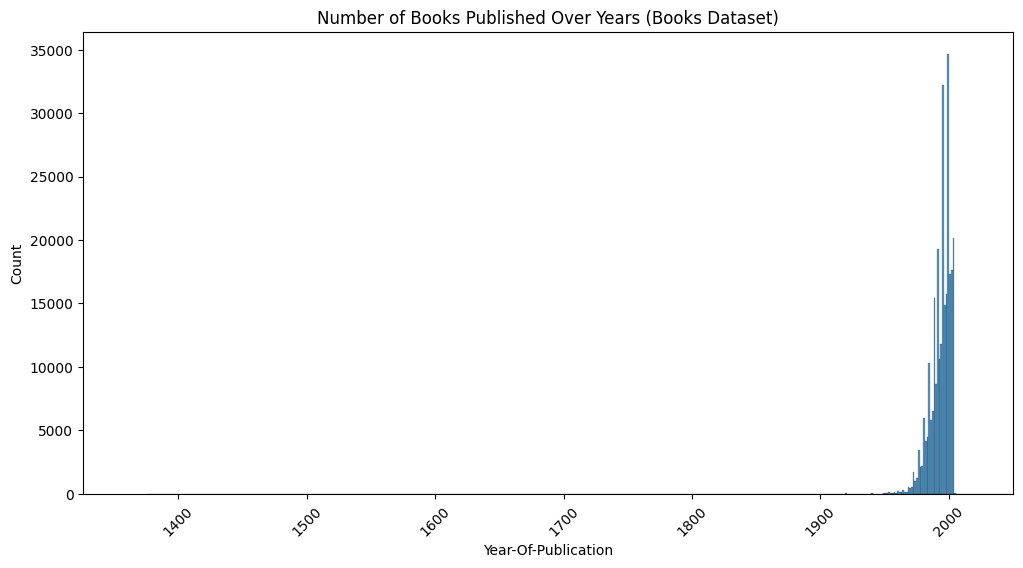

In [37]:
# Plot the histogram for 'Year-Of-Publication'
plt.figure(figsize=(12, 6))
sns.histplot(data=books, x='Year-Of-Publication', bins=500)
plt.xticks(rotation=45)
plt.xlim(books['Year-Of-Publication'].min()-50, books['Year-Of-Publication'].max())
plt.title('Number of Books Published Over Years (Books Dataset)')
plt.show()

As some value of publishing year is 0 , which is like missing value , we will replace those value with median

In [38]:
books['Year-Of-Publication']  =books ['Year-Of-Publication'] .replace(0,publish_year_median)

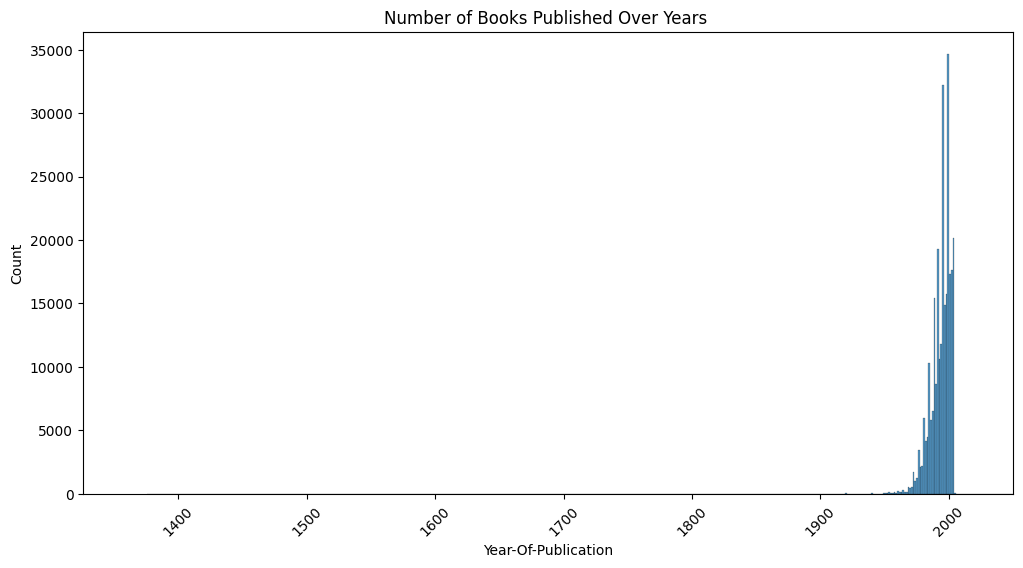

In [39]:
# Plot the histogram for 'Year-Of-Publication'
plt.figure(figsize=(12, 6))
sns.histplot(data=books, x='Year-Of-Publication', bins=500)
plt.xticks(rotation=45)
plt.xlim(books['Year-Of-Publication'].min()-50, books['Year-Of-Publication'].max())
plt.title('Number of Books Published Over Years ')
plt.show()

In [40]:
 books[books['Year-Of-Publication'] < 1900 ].shape[0]


4

Means some books `Year-Of-Publication` of some book near 1400, but as I above chart we see that most of publication year of book after 1900  so we will replace publish year< 1900 with median

In [42]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].apply(lambda x: publish_year_median if x < 1900 else x)

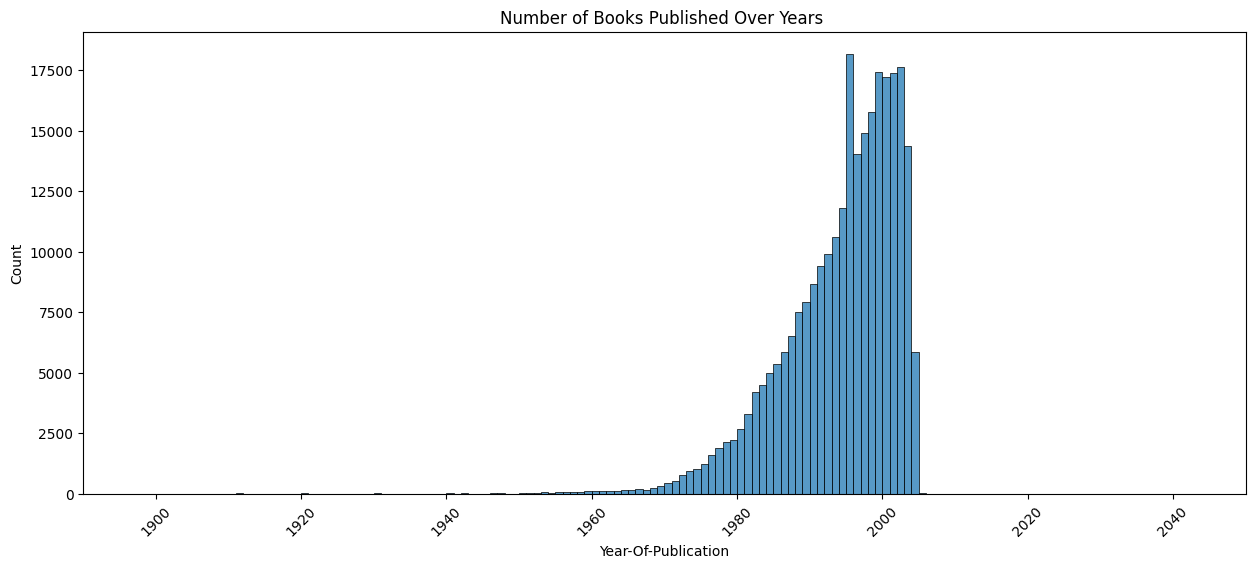

In [44]:
#histogram for Year-Of-Publication
plt.figure(figsize=(15,6))
sns.histplot(data=books, x='Year-Of-Publication',bins=150)
plt.xticks(rotation=45)

# Add padding to the lower bound
plt.xlim(books['Year-Of-Publication'].min()-10, books['Year-Of-Publication'].max())
plt.title('Number of Books Published Over Years ')
plt.show()

In [45]:
users.sample(5)

,User-ID,Location,Age
90375,90376,"east hampton, connecticut, usa",NaN
56702,56703,"san francisco, california, usa",NaN
54408,54409,"kelowna, british columbia, canada",NaN
237127,237128,"dyer, indiana, usa",NaN
200784,200785,"brooklyn, new york, usa",37.0


In [46]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [47]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [49]:
users.duplicated().sum()

0

In [51]:
# Count unique location
unique_location = users['Location'].nunique()
print(f'unique_Location: {unique_location}')

# Top 10 location by number of  rating
top_location = users['Location'].value_counts().head(50)
print(top_location)

unique_Location: 57339
Location
london, england, united kingdom          2506
toronto, ontario, canada                 2250
sydney, new south wales, australia       1744
melbourne, victoria, australia           1708
portland, oregon, usa                    1629
chicago, illinois, usa                   1526
seattle, washington, usa                 1484
new york, new york, usa                  1411
madrid, madrid, spain                    1400
vancouver, british columbia, canada      1359
san diego, california, usa               1277
san francisco, california, usa           1269
ottawa, ontario, canada                  1243
houston, texas, usa                      1187
berlin, berlin, germany                  1173
milano, lombardia, italy                 1157
los angeles, california, usa             1005
austin, texas, usa                        986
calgary, alberta, canada                  981
barcelona, barcelona, spain               905
hamburg, hamburg, germany                 883
ro

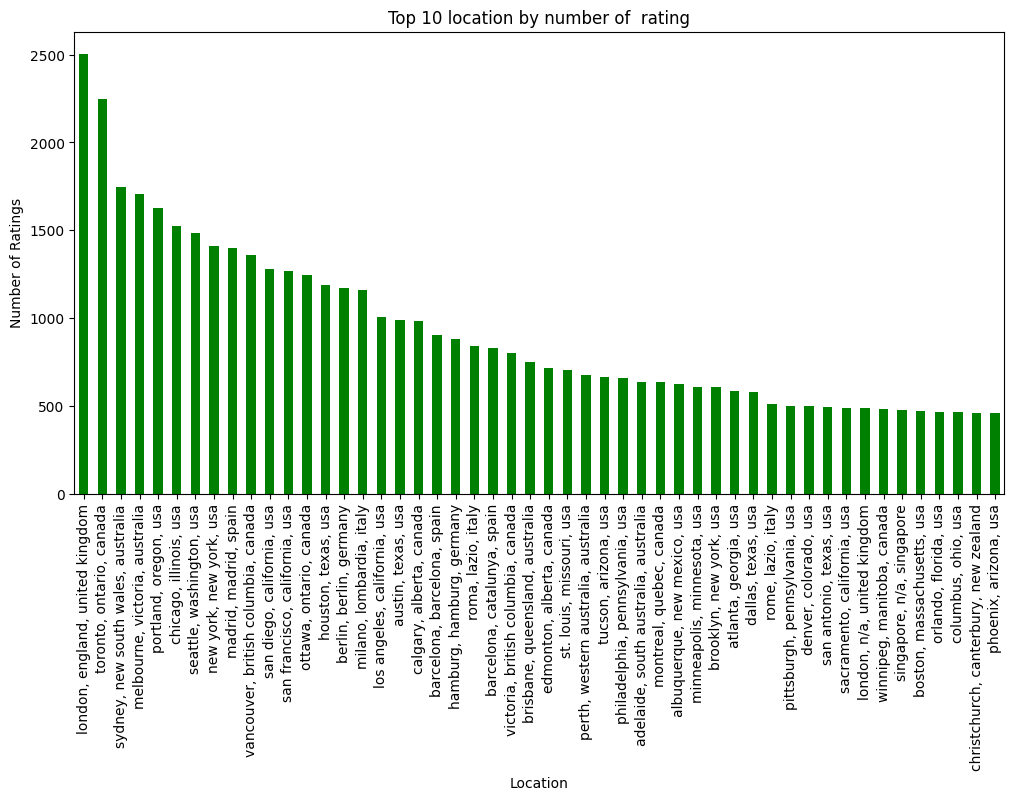

In [55]:
top_location.plot(kind='bar', figsize=(12,6), color='green')
plt.title('Top 10 location by number of  rating')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
# plt.xticks(rotation=45)
plt.show()

In [58]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
926918,225379,0880387165,3
613054,148258,0312913788,0
964981,233143,0312956207,6
69931,14521,0553250256,10
599824,144707,0671034006,8


In [56]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [57]:
ratings.duplicated().sum()

0

In [59]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


##Popularity Based Recommendation System

In [64]:
ratings_with_name =ratings.merge(books, on='ISBN')

In [65]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [77]:
num_rating_df =  ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={ 'Book-Rating' : 'num_ratings' },inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [79]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].agg(lambda x: x.astype(float).mean()).reset_index()
avg_rating_df.rename(columns = {'Book-Rating' : 'avg_rating'}, inplace = True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [81]:
popular_df =  num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [84]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating', ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [102]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [103]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


##Collaborative Filtering Based Recommender System

Users who rated more than 200 books and books with more than 50 rating

In [111]:
x= ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
users_who_rate= x[x].index

In [113]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(users_who_rate)]

In [114]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002.0,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993.0,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999.0,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995.0,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


In [118]:
y= filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [123]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [125]:
pt=final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [126]:
pt.fillna(0,inplace=True)

In [127]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculating euclidiean distance b/w each book vector

In [129]:
from sklearn.metrics.pairwise import cosine_similarity

In [132]:
similarity_scores = cosine_similarity(pt)

In [135]:
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [210]:
def recommend(book_name):

    try:
        index = np.where(pt.index == book_name)[0][0]

        # Calculate similarity and retrieve similar items
        similar_items = sorted(
            list(enumerate(similarity_scores[index])),
            key=lambda x: x[1],
            reverse=True
        )[1:11]  # Exclude the first item (the book itself)

        data=[]
        for i in similar_items:

          item = []
          temp_df = books[books['Book-Title'] == pt.index[i[0]]]
          item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
          item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
          item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

          data.append(item)

        return data

    except IndexError:
        #Where book_name is not found or index retrieval fails
        print(f"Error: '{book_name}' not found in the dataset.")

    except Exception as e:
        # Handle any other potential errors
        print(f"An unexpected error occurred: {e}")


In [211]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

In [212]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))